In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [2]:
Data = pd.read_csv("Full Data.csv")

In [3]:
Data.head()

,Make,Model,Year,Transmission,Fuel,Condition,Avarege Kilometars,Paint,Leather Seats,Navigation System / Map,...,Panoramic Roof,Sports Package,Keyless Entry,LED Lights,Rim Wheels,Xenon Lights,Sunroof,Price,Traction Control,Jayed
0,Audi,A3,2002,Automatic,Gasoline,Used,109999.5,Total repaint,True,False,...,False,False,False,False,True,False,True,1212,True,3
1,Audi,A4,2003,Automatic,Gasoline,Used,290000.0,Total repaint,False,False,...,True,True,False,False,True,True,True,5400,True,4
2,Audi,A4,2007,Automatic,Gasoline,Used,200000.0,Original Paint,True,False,...,False,True,False,True,True,True,True,8900,False,4
3,Audi,A4,2007,Automatic,Gasoline,Used,200000.0,Original Paint,True,False,...,False,False,True,True,False,True,False,8500,False,4
4,Audi,A4,2007,Automatic,Gasoline,Used,230000.0,Original Paint,False,False,...,False,False,False,False,False,True,False,8750,True,4


In [4]:
Data['Jayed'] = Data['Jayed'].astype(str)


In [5]:
Data.describe()

,Avarege Kilometars,Price
count,33948.000000,33948.000000
mean,129491.575527,9828.497172
std,87205.121174,8386.276086
min,0.000000,1000.000000
25%,50000.000000,4200.000000
50%,110000.000000,7800.000000
75%,200000.000000,12800.000000
max,290000.000000,120000.000000


In [6]:
Data.select_dtypes(include=['object', 'category']).describe()


,Make,Model,Year,Transmission,Fuel,Condition,Paint,Jayed
count,33948,33948,33948,33948,33948,33948,33948,33948
unique,72,781,55,2,6,2,4,4
top,Hyundai,Avante,2017,Automatic,Gasoline,Used,Original Paint,4
freq,8188,2322,1625,24941,21919,33568,14932,23882


In [40]:
Data.isna().sum()

Make                       0
Model                      0
Year                       0
Transmission               0
Fuel                       0
Condition                  0
Avarege Kilometars         0
Paint                      0
Leather Seats              0
Navigation System / Map    0
Heated Seats               0
Air Condition              0
Bluetooth                  0
Cruise Control             0
Touch Screen               0
Android Auto               0
Heated Steering Wheel      0
Panoramic Roof             0
Sports Package             0
Keyless Entry              0
LED Lights                 0
Rim Wheels                 0
Xenon Lights               0
Sunroof                    0
Price                      0
Traction Control           0
Jayed                      0
LogPrice                   0
dtype: int64

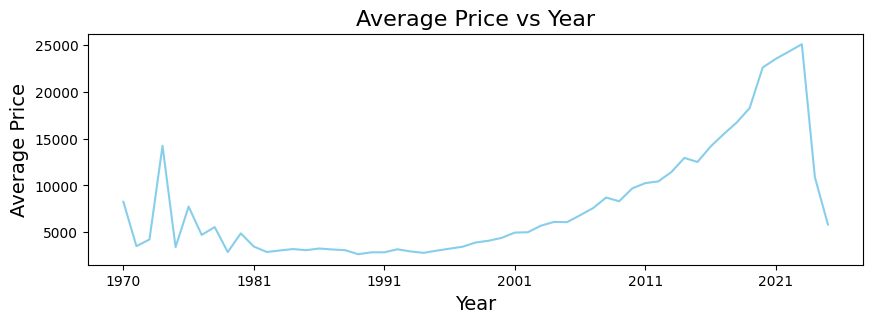

In [92]:
avg_price_by_year = Data.groupby('Year')['Price'].mean()

plt.figure(figsize=(10,3))
plt.plot(avg_price_by_year.index, avg_price_by_year.values, linestyle='-', color='skyblue')
years = avg_price_by_year.index
plt.xticks(ticks=range(0, len(years), 10), labels=years[::10])


# Adding labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Average Price vs Year', fontsize=16)
plt.show()
#plt.grid(axis = 'y')

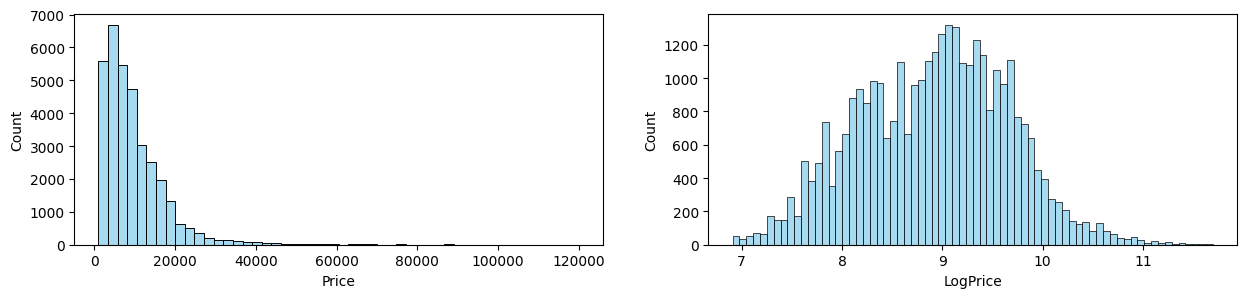

In [38]:
num_cols = ['Price', 'LogPrice']
i=0
while i < 2:
    fig = plt.figure(figsize=[15,3])

    plt.subplot(1,2,1)
    sns.histplot(x=num_cols[i], data=Data , bins = 50, color='skyblue')
    i += 1
    
    plt.subplot(1,2,2)
    sns.histplot(x=num_cols[i], data=Data , color='skyblue')
    i += 1
    
    plt.show()

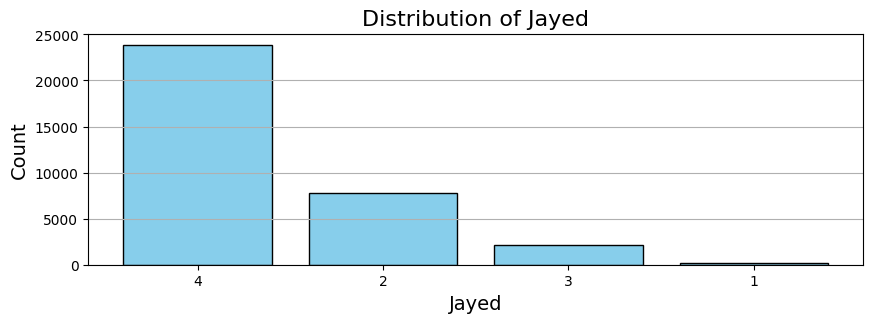

In [83]:
Jayed_counts = Data['Jayed'].value_counts()

plt.figure(figsize=(10,3))
plt.bar(Jayed_counts.index, Jayed_counts.values, color='skyblue', edgecolor='black')

plt.xlabel('Jayed', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Jayed', fontsize=16)

plt.grid(axis = 'y')

plt.show()

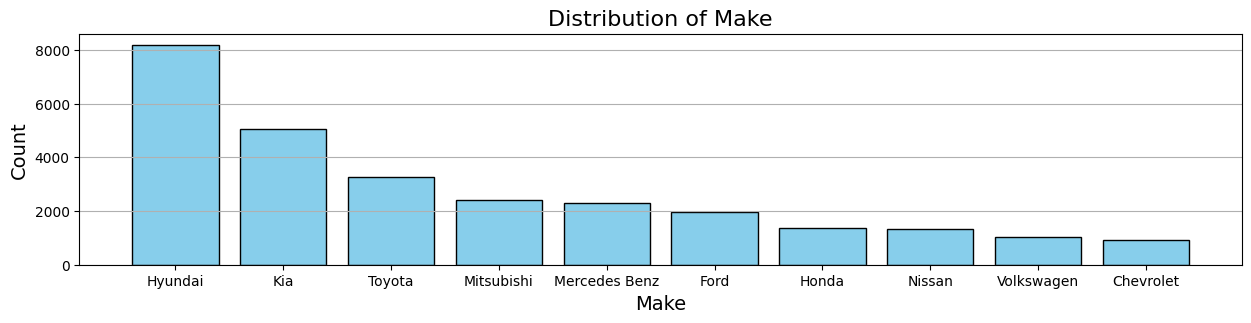

In [60]:
Jayed_counts = Data['Make'].value_counts()[:10]

plt.figure(figsize=(15,3))
plt.bar(Jayed_counts.index, Jayed_counts.values, color='skyblue', edgecolor='black')

plt.xlabel('Make', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Make', fontsize=16)

plt.grid(axis = 'y')

plt.show()

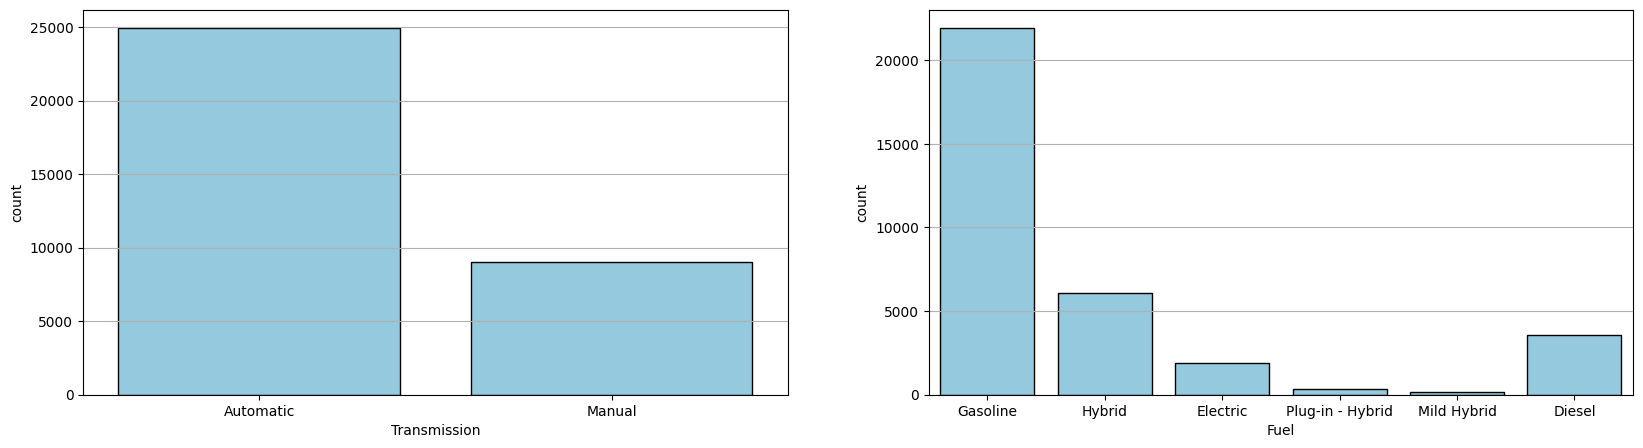

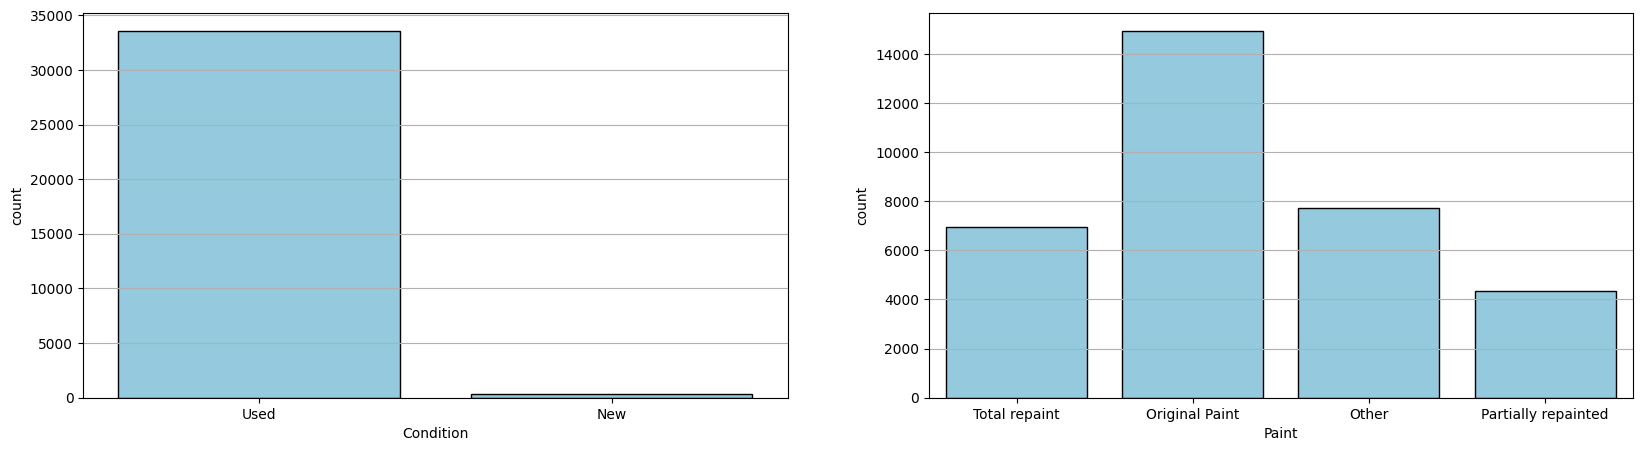

In [79]:
cat_cols = ['Transmission' , 'Fuel' , 'Condition' , 'Paint']
i=0
while i < 4:
    fig = plt.figure(figsize=[20,5])
   
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=Data , color='skyblue', edgecolor='black')
    i += 1
    plt.grid(axis = 'y')
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=Data , color='skyblue', edgecolor='black')
    i += 1
    plt.grid(axis = 'y')
    
    plt.show()

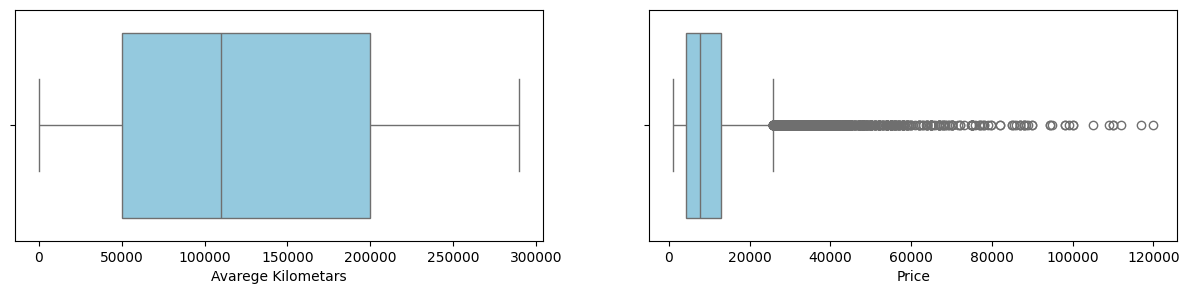

In [61]:
num_cols = ['Avarege Kilometars', 'Price']
i=0
while i < 2:
    fig = plt.figure(figsize=[15,3])

    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=Data ,color='skyblue')
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=Data , color='skyblue')
    i += 1
    plt.show()

In [91]:
Data[Data['Price'] > Data['Price'].quantile(0.99)]


,Make,Model,Year,Transmission,Fuel,Condition,Avarege Kilometars,Paint,Leather Seats,Navigation System / Map,...,Sports Package,Keyless Entry,LED Lights,Rim Wheels,Xenon Lights,Sunroof,Price,Traction Control,Jayed,LogPrice
52,Audi,A6,2020,Automatic,Hybrid,Used,20000.0,Other,True,True,...,False,True,True,False,True,True,48000,False,4,10.778977
135,BMW,330,2020,Automatic,Plug-in - Hybrid,Used,65000.0,Original Paint,True,True,...,True,True,True,True,True,True,43000,True,4,10.668979
262,BMW,530e,2021,Automatic,Plug-in - Hybrid,Used,20000.0,Original Paint,True,True,...,False,True,True,True,True,True,47500,True,4,10.768506
265,BMW,530e,2022,Automatic,Mild Hybrid,Used,20000.0,Other,True,True,...,True,True,True,True,True,True,45000,True,4,10.714440
275,BMW,740,2017,Automatic,Hybrid,Used,110000.0,Original Paint,True,True,...,True,True,True,True,True,False,43500,True,4,10.680539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32393,Toyota,Land Cruiser,2019,Automatic,Gasoline,Used,95000.0,Original Paint,True,True,...,True,True,True,True,True,True,72000,True,4,11.184435
32394,Toyota,Land Cruiser,2020,Automatic,Gasoline,Used,110000.0,Original Paint,True,True,...,False,True,True,True,True,True,62000,True,4,11.034906
32395,Toyota,Land Cruiser,2022,Automatic,Gasoline,Used,20000.0,Original Paint,True,True,...,False,True,True,True,True,True,98000,True,4,11.492733
32396,Toyota,Land Cruiser,2023,Automatic,Gasoline,Used,6000.0,Original Paint,True,True,...,True,True,True,True,True,True,100000,True,4,11.512935
